In [18]:
import numpy as np
import pandas as pd
import keras
import seaborn as sns
import scipy
import sklearn
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('C:/Users/admin/Desktop/creditcard.csv')

In [11]:
# Let's Print
print(data.columns)
print(data.describe)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.2

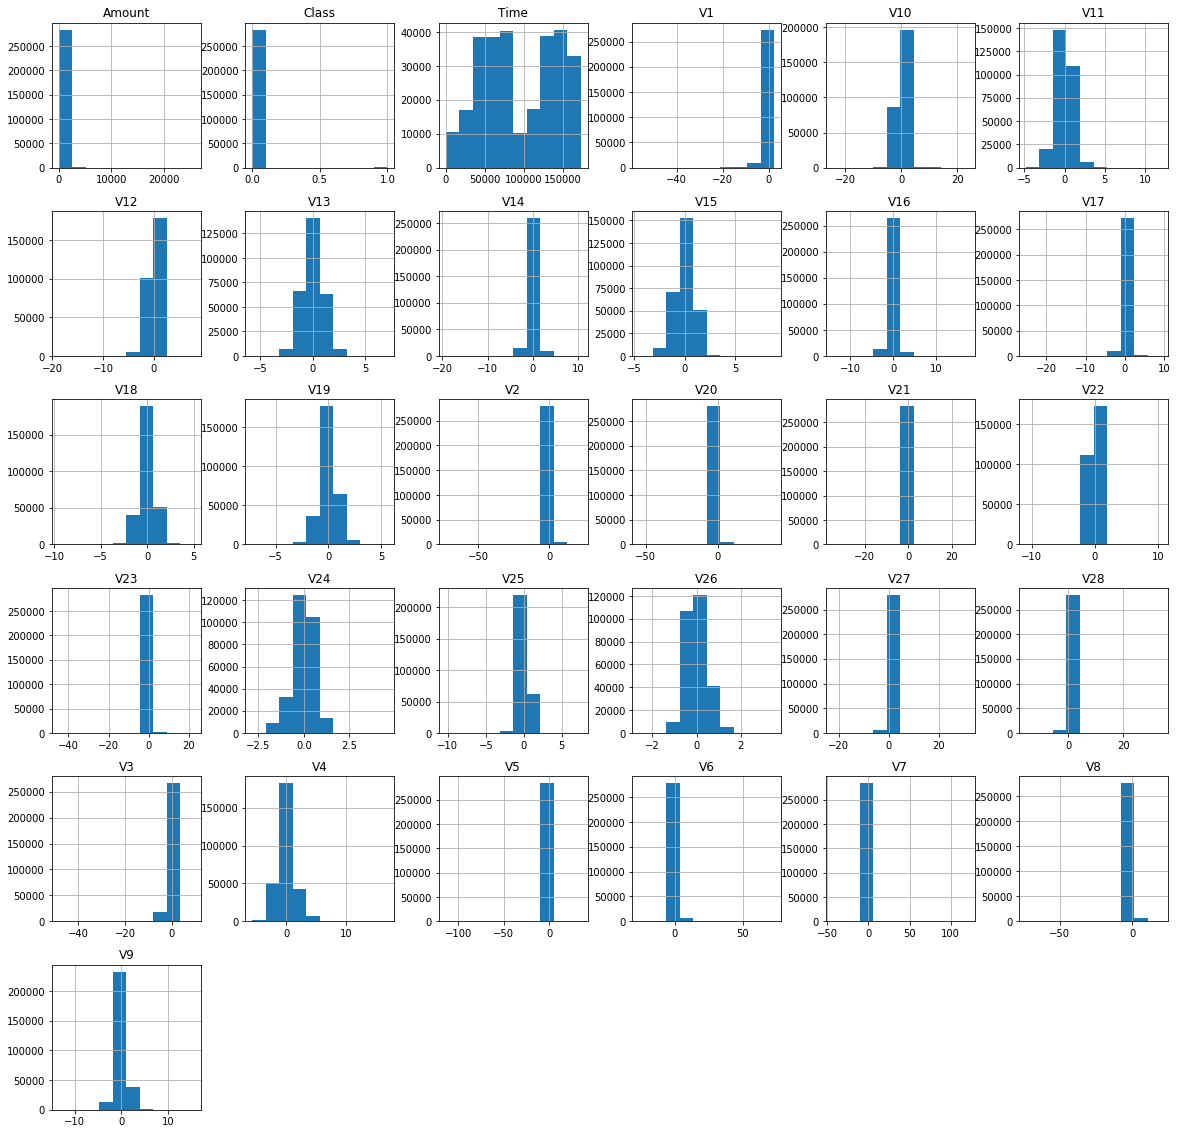

In [19]:
data.hist(figsize=(20, 20))
plt.show()

Lets find out How many Fraud and Valid Cases do we Have

In [21]:
# Determining the Fraud and Valid Transactions
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


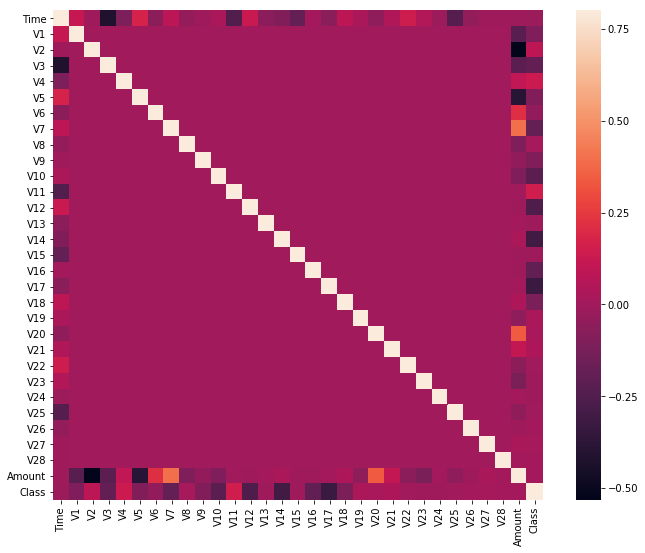

In [22]:
# Correlation Matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [9]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [6]:
data.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

# Pre-processing

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
data['NormalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [9]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  NormalizedAmount  
0 -0.189115  0.133558 -0.021053      0          0.244964  
1  0.125895 -0.008983  0.014724      0         -0.342475  
2 -0.139097 -0.055353 -0.059752      0          1.160686  
3 -0.221929  0.062723  0.061458      0          0.140534  
4  0.502292  0.219422  0.215153      0         -0.073403  

[5 rows x 31 columns]

In [10]:
data = data.drop(['Time'], axis=1)
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Class  NormalizedAmount  
0  0.128539 -0.189115  0.133558 -0.021053      0          0.244964  
1  0.167170  0.125895 -0.008983  0.014724      0         -0.342475  
2 -0.327642 -0.139097 -0.055353 -0.059752      0          1.160686  
3  0.647376 -0.221929  0.062723  0.061458      0          0.140534  
4 -0.206010  0.502292  0.219422  0.215153      0         -0.073403  

[5 rows x 30 columns]

In [11]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [12]:
print(X)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
5       -0.425966   0.960523  1.141109 -0.168252  0.420987 -0.029728   
6        1.229658   0.141004  0.045371  1.202613  0.191881  0.272708   
7       -0.644269   1.417964  1.074380 -0.492199  0.948934  0.428118   
8       -0.894286   0.286157 -0.113192 -0.271526  2.669599  3.721818   
9       -0.338262   1.119593  1.044367 -0.222187  0.499361 -0.246761   
10       1.449044  -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11       0.384978   0.616109 -0.874300 -0.094019  2.924584  3.317027   
12       1.249999  -1.221637  0.383930 -1.234899 -1.485419 -0.75

In [13]:
print(y)

        Class
0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
...       ...
284777      0
284778      0
284779      0
284780      0
284781      0
284782      0
284783      0
284784      0
284785      0
284786      0
284787      0
284788      0
284789      0
284790      0
284791      0
284792      0
284793      0
284794      0
284795      0
284796      0
284797      0
284798      0
284799      0
284800      0
284801      0
284802      0
284803      0
284804      0
284805      0
284806      0

[284807 rows x 1 columns]


In [14]:
y.head()

Class
0      0
1      0
2      0
3      0
4      0

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [16]:
X_train.shape

(199364, 29)

In [17]:
X_test.shape

(85443, 29)

In [21]:
y_train.head()

Class
161145      0
204520      0
182659      0
25117       0
227642      0

In [22]:
#We would have to convert our Train and Testing Dataset into an array for ease of Operation
type(X_train)

pandas.core.frame.DataFrame

In [23]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test= np.array(y_test)

In [24]:
#let's Check if it's successfully converted to an nd.array
type(X_train)

numpy.ndarray

# Deep Neural Network

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [26]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

W0207 07:05:13.617279  5080 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Training

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=9)

Epoch 1/9
199364/199364 [==============================] - ETA: 0s - loss: 0.0138 - acc: 0.9987- ETA: 1 - 31s 156us/step - loss: 0.0138 - acc: 0.9987
Epoch 2/9
199364/199364 [==============================] - 27s 133us/step - loss: 0.0042 - acc: 0.9994
Epoch 3/9
199364/199364 [==============================] - 29s 145us/step - loss: 0.0039 - acc: 0.9994
Epoch 4/9
199364/199364 [==============================] - 27s 134us/step - loss: 0.0036 - acc: 0.9993
Epoch 5/9
199364/199364 [==============================] - 27s 134us/step - loss: 0.0036 - acc: 0.99930s - loss: 0.0036 - 
Epoch 6/9
199364/199364 [==============================] - 27s 134us/step - loss: 0.0034 - acc: 0.9994
Epoch 7/9
199364/199364 [==============================] - 27s 135us/step - loss: 0.0033 - acc: 0.9994
Epoch 8/9
199364/199364 [==============================] - 26s 132us/step - loss: 0.0034 - acc: 0.9994
Epoch 9/9
199364/199364 [==============================] - 23s 118us/step - loss: 0.0030 - acc: 0.9994


In [30]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 2s 22us/step


In [32]:
print(score)

[0.0037978913295400696, 0.9994265182636377]


In [36]:
import matplotlib.pyplot as plt
import itertools
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [38]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [39]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [40]:
print(cnf_matrix)

[[85286    10]
 [   39   108]]


In [41]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])

Confusion matrix, without normalization
[[85286    10]
 [   39   108]]


# We predited almost 85,286 all non-fraudulent transaction, there were 39 fraudulent transactions that we classified as Non-fraudulent

## There were 10 Non-Fraudulent transactions that we Classified as Fraudulent, Genuine customer were trying to make a Payment but,they failed to do so as their transaction was marked as fraudulent

### There were 39 People whom we couldn't catch out of 150 people that tried to fraud us, we were able to catch 108 Actual Fraud Transactions

Confusion matrix, without normalization
[[85286    10]
 [   39   108]]


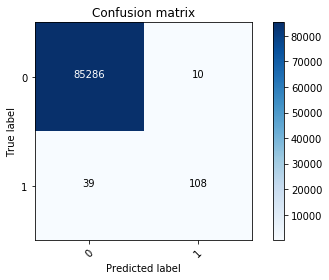

In [42]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
conf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()